In [513]:
import pandas as pd

# Load the dataset from the specified location
file_path = 'data/HeartStepsV1-main/data_files/suggestions.csv'
columns_to_include = [
    'user.index', 'avail', 'decision.index.nogap', 'sugg.decision.utime','sugg.response.utime', 'sugg.device.since', 
    'interaction.count', 'send', 'send.sedentary', 'send.active', 'recognized.activity', 
    'tag.active', 'tag.indoor', 'tag.outdoor', 'tag.outdoor_snow', 'front.end.application', 
    'dec.location.category', 'dec.weather.condition', 'dec.temperature', 'dec.windspeed', 
    'dec.precipitation.chance', 'dec.snow', 'jbsteps30', 'jbmins30', 'jbsteps60', 'jbmins60', "jbsteps120", "jbmins120", 'response'
]

# Load the dataset with the specified columns and filter where 'Send' is True
suggestions_df = pd.read_csv(file_path, usecols=columns_to_include)


/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/1221659875.py:14: DtypeWarning: Columns (21,22,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  suggestions_df = pd.read_csv(file_path, usecols=columns_to_include)


In [514]:
import numpy as np

# Ensure 'sugg.decision.utime' is in datetime format
suggestions_df['sugg.decision.utime'] = pd.to_datetime(suggestions_df['sugg.decision.utime'])

# Step 1: Find rows where both 'dec.weather.condition' and 'dec.temperature' are NaN
rows_to_impute = suggestions_df[suggestions_df['dec.snow'].isna() & suggestions_df['dec.temperature'].isna()]

# Step 2: Impute missing values by finding the closest match
for idx, row in rows_to_impute.iterrows():
    user_id = row['user.index']
    decision_time = row['sugg.decision.utime']

    # Find rows from the same user that have non-NaN values for both weather and temperature
    potential_matches = suggestions_df[
        (suggestions_df['user.index'] == user_id) &
        (~suggestions_df['dec.snow'].isna()) &
        (~suggestions_df['dec.temperature'].isna())
    ]

    # Filter by rows within 6 hours of the current row's decision time
    time_difference = np.abs(potential_matches['sugg.decision.utime'] - decision_time)
    within_time_window = potential_matches[time_difference <= pd.Timedelta(hours=6)]

    if not within_time_window.empty:
        # Find the row with the smallest time difference
        closest_row = within_time_window.loc[time_difference.idxmin()]
        print(closest_row["sugg.decision.utime"], decision_time, closest_row["user.index"], user_id)

        # Step 3: Impute the missing values with those from the closest row
        suggestions_df.at[idx, 'dec.snow'] = closest_row['dec.snow']
        suggestions_df.at[idx, 'dec.temperature'] = closest_row['dec.temperature']

# Now, the missing values for 'dec.weather.condition' and 'dec.temperature' should be imputed where possible


2015-08-30 21:31:00 2015-08-30 23:31:30 1 1
2015-07-24 17:01:56 2015-07-24 19:01:30 2 2
2015-07-25 12:31:44 2015-07-25 17:01:30 2 2
2015-07-25 17:01:30 2015-07-25 19:01:30 2 2
2015-07-28 22:01:20 2015-07-29 00:31:30 2 2
2015-07-31 00:32:02 2015-07-30 22:01:30 2 2
2015-07-31 12:34:48 2015-07-31 17:01:30 2 2
2015-07-31 17:01:30 2015-07-31 19:01:30 2 2
2015-08-01 17:01:32 2015-08-01 12:31:30 2 2
2015-08-02 19:00:57 2015-08-02 17:01:30 2 2
2015-08-03 22:02:22 2015-08-03 17:01:30 2 2
2015-08-03 17:01:30 2015-08-03 19:01:30 2 2
2015-08-03 22:02:22 2015-08-04 00:31:30 2 2
2015-08-06 17:01:31 2015-08-06 13:31:30 2 2
2015-08-07 00:33:29 2015-08-06 22:01:30 2 2
2015-08-07 19:02:47 2015-08-07 17:01:30 2 2
2015-08-08 19:02:42 2015-08-08 17:01:30 2 2
2015-08-12 00:32:05 2015-08-11 22:01:30 2 2
2015-08-12 17:01:19 2015-08-12 19:01:30 2 2
2015-08-15 00:31:05 2015-08-14 22:01:30 2 2
2015-08-15 19:01:43 2015-08-15 17:01:30 2 2
2015-08-17 19:01:15 2015-08-17 17:01:30 2 2
2015-08-17 19:01:15 2015-08-17 2

In [515]:
import numpy as np

# Ensure 'sugg.decision.utime' is in datetime format
suggestions_df['sugg.decision.utime'] = pd.to_datetime(suggestions_df['sugg.decision.utime'])

# Step 1: Find rows where both 'dec.weather.condition' and 'dec.temperature' are NaN
rows_to_impute = suggestions_df[suggestions_df['dec.weather.condition'].isna()]

# Step 2: Impute missing values by finding the closest match
for idx, row in rows_to_impute.iterrows():
    user_id = row['user.index']
    decision_time = row['sugg.decision.utime']

    # Find rows from the same user that have non-NaN values for both weather and temperature
    potential_matches = suggestions_df[
        (suggestions_df['user.index'] == user_id) &
        (~suggestions_df['dec.weather.condition'].isna()) 
    ]

    # Filter by rows within 6 hours of the current row's decision time
    time_difference = np.abs(potential_matches['sugg.decision.utime'] - decision_time)
    within_time_window = potential_matches[time_difference <= pd.Timedelta(hours=6)]

    if not within_time_window.empty:
        # Find the row with the smallest time difference
        closest_row = within_time_window.loc[time_difference.idxmin()]
        print(closest_row["sugg.decision.utime"], decision_time, closest_row["user.index"], user_id)

        # Step 3: Impute the missing values with those from the closest row
        suggestions_df.at[idx, 'dec.weather.condition'] = closest_row['dec.weather.condition']

# Now, the missing values for 'dec.weather.condition' and 'dec.temperature' should be imputed where possible


2015-08-30 21:31:00 2015-08-30 23:31:30 1 1
2015-07-24 17:01:56 2015-07-24 19:01:30 2 2
2015-07-25 12:31:44 2015-07-25 17:01:30 2 2
2015-07-25 17:01:30 2015-07-25 19:01:30 2 2
2015-07-28 22:01:20 2015-07-29 00:31:30 2 2
2015-07-31 00:32:02 2015-07-30 22:01:30 2 2
2015-07-31 12:34:48 2015-07-31 17:01:30 2 2
2015-07-31 17:01:30 2015-07-31 19:01:30 2 2
2015-08-01 17:01:32 2015-08-01 12:31:30 2 2
2015-08-02 19:00:57 2015-08-02 17:01:30 2 2
2015-08-03 00:32:56 2015-08-02 22:03:20 2 2
2015-08-03 22:02:22 2015-08-03 17:01:30 2 2
2015-08-03 17:01:30 2015-08-03 19:01:30 2 2
2015-08-03 22:02:22 2015-08-04 00:31:30 2 2
2015-08-06 17:01:31 2015-08-06 13:31:30 2 2
2015-08-07 00:33:29 2015-08-06 22:01:30 2 2
2015-08-07 19:02:47 2015-08-07 17:01:30 2 2
2015-08-08 19:02:42 2015-08-08 17:01:30 2 2
2015-08-12 00:32:05 2015-08-11 22:01:30 2 2
2015-08-12 17:01:19 2015-08-12 19:01:30 2 2
2015-08-15 00:31:05 2015-08-14 22:01:30 2 2
2015-08-15 19:01:43 2015-08-15 17:01:30 2 2
2015-08-17 19:01:15 2015-08-17 1

In [516]:
filtered_suggestions_df = suggestions_df[suggestions_df['send'] == True]
unsent_suggestions_df = (suggestions_df[suggestions_df['send'] == False])[suggestions_df["avail"] == True]
filtered_suggestions_df.shape, unsent_suggestions_df.shape

# # Step 1: Drop rows where jbsteps60 > 4000 in filtered_suggestion_df (sent suggestions)
# filtered_suggestions_df = filtered_suggestions_df[filtered_suggestions_df['jbsteps60'] <= 2000]

# # Step 2: Drop rows where jbsteps60 > 4000 in unsent_suggestions_df (unsent suggestions)
# unsent_suggestions_df = unsent_suggestions_df[unsent_suggestions_df['jbsteps60'] <= 2000]

/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/1964768799.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unsent_suggestions_df = (suggestions_df[suggestions_df['send'] == False])[suggestions_df["avail"] == True]


((3918, 29), (2675, 29))

In [517]:
# Step 2: Handle missing sugg.response.utime by replacing with a placeholder and adjusting related columns
placeholder_response_time = "No Response"  # Define a placeholder value

# Ensure that when sugg.response.utime is NaN, interaction.count and response are NaN as well
missing_response = suggestions_df['sugg.response.utime'].isna() & suggestions_df['interaction.count'].isna() & suggestions_df['response'].isna()

# Replace NaN in sugg.response.utime with placeholder, set interaction.count to -1, and response to "No Response"
filtered_suggestions_df.loc[missing_response, 'sugg.response.utime'] = placeholder_response_time
filtered_suggestions_df.loc[missing_response, 'interaction.count'] = -1
filtered_suggestions_df.loc[missing_response, 'response'] = "No Response"


In [518]:
placeholder_response_time = "Unknown"  # Define a placeholder value

# Ensure that when sugg.response.utime is NaN, interaction.count and response are NaN as well
missing_response = suggestions_df['sugg.response.utime'].isna() & suggestions_df['interaction.count'].isna() & suggestions_df['response'].isna()

# Replace NaN in sugg.response.utime with placeholder, set interaction.count to -1, and response to "No Response"
filtered_suggestions_df.loc[missing_response, 'sugg.response.utime'] = placeholder_response_time
filtered_suggestions_df.loc[missing_response, 'interaction.count'] = -1
filtered_suggestions_df.loc[missing_response, 'response'] = "No Response"


In [519]:
res = ["com.google.appengine.labs.repackaged.org.json.JSONObject.<init>(JSONObject.java:179)", "com.google.appengine.labs.repackaged.org.json.JSONObject.getJSONObject(JSONObject.java:516)"]

def clean_weather_conditions(value):
    if value in res:
        return None
    else:
        return value
filtered_suggestions_df["dec.weather.condition"] = filtered_suggestions_df["dec.weather.condition"].apply(clean_weather_conditions)
unsent_suggestions_df["dec.weather.condition"] = unsent_suggestions_df["dec.weather.condition"].apply(clean_weather_conditions)
filtered_suggestions_df.shape

/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/3325055051.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_suggestions_df["dec.weather.condition"] = filtered_suggestions_df["dec.weather.condition"].apply(clean_weather_conditions)


(3918, 29)

In [520]:
missing_response = suggestions_df['sugg.device.since'].isna()

# Replace NaN in sugg.device.utime with placeholder, set sugg.device.since to 0
filtered_suggestions_df.loc[missing_response, 'sugg.device.since'] = 0

In [521]:
# Step 3: Drop rows where interaction.count or response are still NaN
filtered_suggestions_df.dropna(subset=['interaction.count', 'response'], inplace=True)
filtered_suggestions_df.dropna(subset=['jbmins60'], inplace=True)

filtered_suggestions_df.shape

/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/3236427295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_suggestions_df.dropna(subset=['interaction.count', 'response'], inplace=True)
/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/3236427295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_suggestions_df.dropna(subset=['jbmins60'], inplace=True)


(3439, 29)

In [522]:
# Step 4: Delete the column 'send'
filtered_suggestions_df.drop(columns=['send', "avail"], inplace=True)
filtered_suggestions_df.dropna(subset=['send.active'], inplace=True)
filtered_suggestions_df.shape


/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/4095380717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_suggestions_df.drop(columns=['send', "avail"], inplace=True)
/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/4095380717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_suggestions_df.dropna(subset=['send.active'], inplace=True)


(3438, 27)

In [523]:
# Step 5: Convert NaN in front.end.application to "OFF"
filtered_suggestions_df['front.end.application'].fillna("OFF", inplace=True)
filtered_suggestions_df.shape




/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/2187487078.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_suggestions_df['front.end.application'].fillna("OFF", inplace=True)
/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/2187487078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sug

(3438, 27)

In [524]:
# Step 6: Create a new 'Time of Day' column from sugg.decision.utime
filtered_suggestions_df['sugg.decision.utime'] = pd.to_datetime(filtered_suggestions_df['sugg.decision.utime'])
filtered_suggestions_df['Time of Day'] = filtered_suggestions_df['sugg.decision.utime'].dt.time
unsent_suggestions_df['Time of Day'] = unsent_suggestions_df['sugg.decision.utime'].dt.time


/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/3925890775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_suggestions_df['sugg.decision.utime'] = pd.to_datetime(filtered_suggestions_df['sugg.decision.utime'])
/var/folders/qc/46z_x3td2l55q77fsffm737h0000gn/T/ipykernel_16918/3925890775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_suggestions_df['Time of Day'] = filtered_suggestions_df['sugg.decision.utime'].dt.time


In [525]:
nan_report = filtered_suggestions_df.isna().sum()
nan_report = nan_report[nan_report > 0]  # Only show columns with NaN values

if not nan_report.empty:
    print("Columns with NaN values and their counts:")
    print(nan_report)

    # For each column with NaN values, print the indices of the rows where NaN is present
    for column in nan_report.index:
        nan_indices = filtered_suggestions_df[filtered_suggestions_df[column].isna()].index.tolist()
        print(f"Indices with NaN in {column}: {nan_indices}")
else:
    print("No NaN values remaining in the dataset.")

Columns with NaN values and their counts:
decision.index.nogap     32
dec.weather.condition     3
dec.temperature          26
dec.snow                 26
dtype: int64
Indices with NaN in decision.index.nogap: [104, 105, 189, 192, 193, 201, 203, 615, 616, 618, 619, 1272, 2737, 2752, 2754, 2756, 2757, 3033, 3034, 3037, 3038, 3041, 3042, 3044, 3048, 3049, 3050, 3058, 3061, 3064, 3065, 3066]
Indices with NaN in dec.weather.condition: [3886, 4186, 5075]
Indices with NaN in dec.temperature: [1272, 1544, 1564, 1565, 1567, 1568, 1570, 1571, 1573, 1577, 1578, 1595, 1596, 1597, 1601, 1603, 2752, 2754, 2756, 3546, 3767, 3769, 3770, 3802, 3803, 3805]
Indices with NaN in dec.snow: [1272, 1544, 1564, 1565, 1567, 1568, 1570, 1571, 1573, 1577, 1578, 1595, 1596, 1597, 1601, 1603, 2752, 2754, 2756, 3546, 3767, 3769, 3770, 3802, 3803, 3805]


In [526]:
filtered_suggestions_df.to_csv("data/modified_data/Cleaned Dataset.csv")

In [527]:
nan_report = unsent_suggestions_df.isna().sum()
nan_report = nan_report[nan_report > 0]  # Only show columns with NaN values

if not nan_report.empty:
    print("Columns with NaN values and their counts:")
    print(nan_report)

    # For each column with NaN values, print the indices of the rows where NaN is present
    for column in nan_report.index:
        nan_indices = filtered_suggestions_df[filtered_suggestions_df[column].isna()].index.tolist()
        print(f"Indices with NaN in {column}: {nan_indices}")
else:
    print("No NaN values remaining in the dataset.")

Columns with NaN values and their counts:
decision.index.nogap       99
sugg.response.utime      2675
sugg.device.since         705
interaction.count        2675
tag.active               2424
tag.indoor               2424
tag.outdoor              2424
tag.outdoor_snow         2424
front.end.application    2147
response                 2675
dec.weather.condition       5
dec.temperature            27
dec.snow                   27
jbmins30                  311
jbsteps30                 311
jbmins60                  311
jbsteps60                 311
jbmins120                 311
jbsteps120                311
dtype: int64
Indices with NaN in decision.index.nogap: [104, 105, 189, 192, 193, 201, 203, 615, 616, 618, 619, 1272, 2737, 2752, 2754, 2756, 2757, 3033, 3034, 3037, 3038, 3041, 3042, 3044, 3048, 3049, 3050, 3058, 3061, 3064, 3065, 3066]
Indices with NaN in sugg.response.utime: []
Indices with NaN in sugg.device.since: []
Indices with NaN in interaction.count: []
Indices with NaN in tag

In [528]:
unsent_suggestions_df

,user.index,decision.index.nogap,sugg.decision.utime,sugg.response.utime,sugg.device.since,interaction.count,avail,send,send.active,send.sedentary,...,dec.windspeed,dec.precipitation.chance,dec.snow,jbmins30,jbsteps30,jbmins60,jbsteps60,jbmins120,jbsteps120,Time of Day
2,1,2.0,2015-07-22 21:31:48,NaN,0.021667,NaN,True,False,False,False,...,3.7,0.0,0.0,11.0,341.0,17.0,473.0,61.0,4648.0,21:31:48
4,1,4.0,2015-07-23 09:31:31,NaN,7.062222,NaN,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09:31:31
8,1,8.0,2015-07-23 23:32:54,NaN,0.266111,NaN,True,False,False,False,...,0.0,0.0,0.0,9.0,386.0,17.0,743.0,19.0,783.0,23:32:54
9,1,9.0,2015-07-24 09:31:49,NaN,6.012500,NaN,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,79.0,09:31:49
13,1,13.0,2015-07-24 23:31:40,NaN,0.047222,NaN,True,False,False,False,...,3.7,0.0,0.0,11.0,447.0,19.0,663.0,47.0,2539.0,23:31:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,37,208.0,2016-01-22 19:02:15,NaN,1.208056,NaN,True,False,False,False,...,0.0,15.0,0.0,4.0,92.0,16.0,638.0,22.0,807.0,19:02:15
8261,37,217.0,2016-01-24 16:27:31,NaN,0.178333,NaN,True,False,False,False,...,4.0,0.0,0.0,5.0,129.0,11.0,490.0,16.0,811.0,16:27:31
8262,37,218.0,2016-01-24 19:01:31,NaN,2.745000,NaN,True,False,False,False,...,7.0,0.0,0.0,0.0,0.0,2.0,69.0,6.0,368.0,19:01:31
8263,37,219.0,2016-01-24 22:26:52,NaN,0.511944,NaN,True,False,False,False,...,4.0,1.0,0.0,3.0,73.0,6.0,161.0,7.0,180.0,22:26:52


In [529]:
unsent_suggestions_df.drop(columns=['sugg.response.utime', "send", "send.active", "send.sedentary", "interaction.count", "tag.active", "tag.indoor", "tag.outdoor", "tag.outdoor_snow", "front.end.application", "response", "avail"], inplace=True)


In [530]:
unsent_suggestions_df

,user.index,decision.index.nogap,sugg.decision.utime,sugg.device.since,recognized.activity,dec.location.category,dec.weather.condition,dec.temperature,dec.windspeed,dec.precipitation.chance,dec.snow,jbmins30,jbsteps30,jbmins60,jbsteps60,jbmins120,jbsteps120,Time of Day
2,1,2.0,2015-07-22 21:31:48,0.021667,STILL,home,Mostly Cloudy,25.8,3.7,0.0,0.0,11.0,341.0,17.0,473.0,61.0,4648.0,21:31:48
4,1,4.0,2015-07-23 09:31:31,7.062222,STILL,home,Clear,11.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09:31:31
8,1,8.0,2015-07-23 23:32:54,0.266111,STILL,home,Partly Cloudy,27.5,0.0,0.0,0.0,9.0,386.0,17.0,743.0,19.0,783.0,23:32:54
9,1,9.0,2015-07-24 09:31:49,6.012500,STILL,home,Clear,16.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,79.0,09:31:49
13,1,13.0,2015-07-24 23:31:40,0.047222,STILL,home,Clear,32.1,3.7,0.0,0.0,11.0,447.0,19.0,663.0,47.0,2539.0,23:31:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,37,208.0,2016-01-22 19:02:15,1.208056,STILL,"store,point_of_interest,establishment",Overcast,-2.6,0.0,15.0,0.0,4.0,92.0,16.0,638.0,22.0,807.0,19:02:15
8261,37,217.0,2016-01-24 16:27:31,0.178333,STILL,home,Partly Cloudy,-0.9,4.0,0.0,0.0,5.0,129.0,11.0,490.0,16.0,811.0,16:27:31
8262,37,218.0,2016-01-24 19:01:31,2.745000,STILL,home,Clear,1.9,7.0,0.0,0.0,0.0,0.0,2.0,69.0,6.0,368.0,19:01:31
8263,37,219.0,2016-01-24 22:26:52,0.511944,STILL,home,Overcast,0.6,4.0,1.0,0.0,3.0,73.0,6.0,161.0,7.0,180.0,22:26:52


In [531]:
unsent_suggestions_df.dropna(subset=['jbmins60'], inplace=True)


In [532]:
nan_report = unsent_suggestions_df.isna().sum()
nan_report = nan_report[nan_report > 0]  # Only show columns with NaN values

if not nan_report.empty:
    print("Columns with NaN values and their counts:")
    print(nan_report)

    # For each column with NaN values, print the indices of the rows where NaN is present
    for column in nan_report.index:
        nan_indices = filtered_suggestions_df[filtered_suggestions_df[column].isna()].index.tolist()
        print(f"Indices with NaN in {column}: {nan_indices}")
else:
    print("No NaN values remaining in the dataset.")

Columns with NaN values and their counts:
decision.index.nogap      23
sugg.device.since        570
dec.weather.condition      5
dec.temperature           21
dec.snow                  21
dtype: int64
Indices with NaN in decision.index.nogap: [104, 105, 189, 192, 193, 201, 203, 615, 616, 618, 619, 1272, 2737, 2752, 2754, 2756, 2757, 3033, 3034, 3037, 3038, 3041, 3042, 3044, 3048, 3049, 3050, 3058, 3061, 3064, 3065, 3066]
Indices with NaN in sugg.device.since: []
Indices with NaN in dec.weather.condition: [3886, 4186, 5075]
Indices with NaN in dec.temperature: [1272, 1544, 1564, 1565, 1567, 1568, 1570, 1571, 1573, 1577, 1578, 1595, 1596, 1597, 1601, 1603, 2752, 2754, 2756, 3546, 3767, 3769, 3770, 3802, 3803, 3805]
Indices with NaN in dec.snow: [1272, 1544, 1564, 1565, 1567, 1568, 1570, 1571, 1573, 1577, 1578, 1595, 1596, 1597, 1601, 1603, 2752, 2754, 2756, 3546, 3767, 3769, 3770, 3802, 3803, 3805]


In [533]:
unsent_suggestions_df.to_csv("data/modified_data/Cleaned Unsent Dataset.csv")

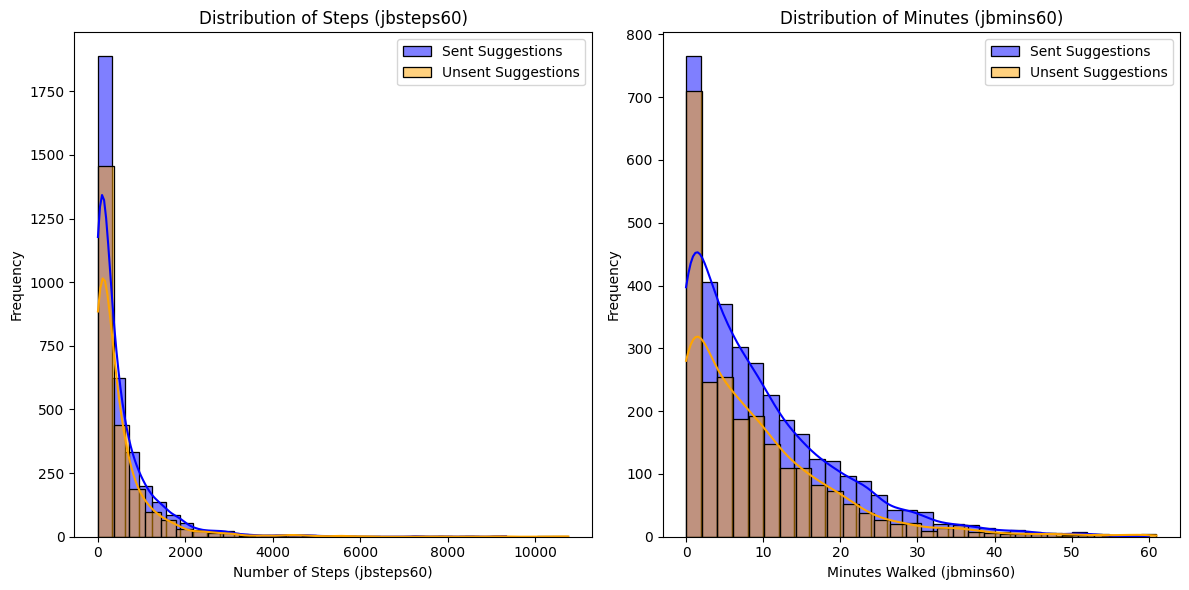

In [534]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `unsent_suggestions_df` is already loaded alongside `filtered_suggestion_df`

# Step 1: Plot the distribution of jbsteps60 for both sent and unsent suggestions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of steps (jbsteps60)
sns.histplot(filtered_suggestions_df['jbsteps60'], bins=30, kde=True, color='blue', ax=axes[0], label='Sent Suggestions')
sns.histplot(unsent_suggestions_df['jbsteps60'], bins=30, kde=True, color='orange', ax=axes[0], label='Unsent Suggestions')
axes[0].set_title('Distribution of Steps (jbsteps60)')
axes[0].set_xlabel('Number of Steps (jbsteps60)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Step 2: Plot the distribution of jbmins60 for both sent and unsent suggestions
sns.histplot(filtered_suggestions_df['jbmins60'], bins=30, kde=True, color='blue', ax=axes[1], label='Sent Suggestions')
sns.histplot(unsent_suggestions_df['jbmins60'], bins=30, kde=True, color='orange', ax=axes[1], label='Unsent Suggestions')
axes[1].set_title('Distribution of Minutes (jbmins60)')
axes[1].set_xlabel('Minutes Walked (jbmins60)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
